In [43]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$


In [36]:
def RIT(x, y, z, q, s):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    I = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2 + XYZ[1,n]**2/q**2 + XYZ[2,n]**2/s**2)
                Xi = sum(XYZ[i,n])
                Xj = sum(XYZ[j,n])
                XX[n] = Xi * Xj / d**2
            I[i][j] = sum(XX)
    return I
                    

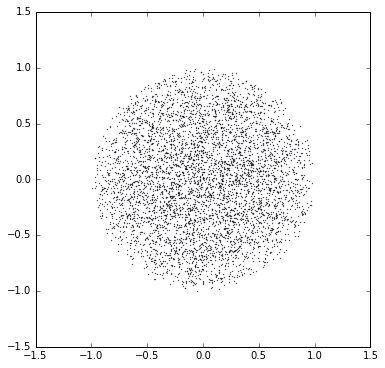

In [68]:
figure(figsize=(6, 6))
phi = random.rand(5000) * 2*pi
theta = random.rand(5000) * 2 - 1
R = random.rand(5000)
X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
Z = R**(1/3.0) * cos(arccos(theta))
n_points=5000
#X = random.rand(n_points) * 2.0 - 1.0
#Y = random.rand(n_points) * 2.0 - 1.0
#Z = random.rand(n_points) * 20.0 - 10.0

scatter(Y, Z, s=0.1)

In [69]:
I_test = RIT(X, Y, Z, 1, 1)
print I_test

[[ 1681.61772391    11.21199718    -6.05109499]
 [   11.21199718  1657.19527857    17.07681716]
 [   -6.05109499    17.07681716  1661.18699752]]


The eigenvalues represents the axis ratios of the new set of principal axis. 

In [70]:
eival, evec = eig(I_test)
print evec
print eival

[[-0.27716084  0.92357813 -0.26492512]
 [ 0.73181586  0.38158425  0.56465831]
 [-0.62259731  0.03737523  0.78164933]]
[ 1638.42073754  1686.00518211  1675.57408035]


In [64]:
print dot(evec[1], evec[2])

1.66153982933e-16


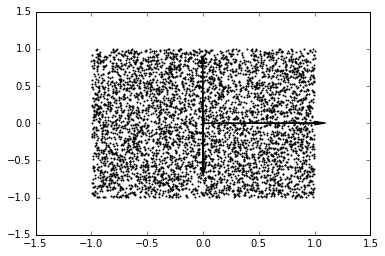

In [49]:
fig = plt.figure()
scatter(X, Y, s=1)
plt.arrow(0, 0, evec[0][0], evec[0][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, evec[1][0], evec[1][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, evec[2][0], evec[2][1], head_width=0.05, head_length=0.1, fc='k', ec='k')

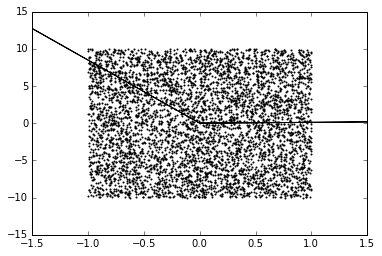

In [66]:
fig = plt.figure()
scatter(Y, Z, s=1)
#ylim(-4000, 8000)
#xlim(-4000, 4000)
plt.arrow(0, 0, evec[0][1] * np.sqrt(eival[0]), evec[0][2] * np.sqrt(eival[0]), head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, evec[1][1] * np.sqrt(eival[1]), evec[1][2] * np.sqrt(eival[1]), head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, evec[2][1] * np.sqrt(eival[2]), evec[2][2] * np.sqrt(eival[2]), head_width=0.05, head_length=0.1, fc='k', ec='k')

In [165]:
dot(evec[0], evec[1])

3.4972025275692431e-15

In [74]:
def shape(X, Y, Z, tol):
    old_q = 1.2
    old_s
    new_q = 1.0
    new_s = 1.0 
    while((new_s - old_s > tol) & (new_q - old_q > tol)):
        old_s = new_s
        old_q = new_q
        I_test = RIT(X, Y, Z, q, s)
        eival, evec = eig(I_test)
        oeival = sort(eival)
        #print oeival
        la = oeival[2]
        lb = oeival[1]
        lc = oeival[0]
        new_s = np.sqrt(lc/la)
        new_q = np.sqrt(lb/la)
        #print Ixy, Ixz, Iyx, Iyz, Izx, Izy
    return s, q


In [245]:
eival, evec = eig(I_test)
print eival
oival = sort(eival)
ax = oival[2]
ay = oival[1]
az = oival[0]
s = sqrt(az/ax)
q = sqrt(ay/ax)
#aa = max(eival)
#print ax, ay, az
#print 'eigen vectors'
print '--------------'
print evec
I_test = RIT(X, Y, Z, q, s)
print '-------------'
print I_test



[ 16553.50197571  16708.47734496  16738.02067933]
--------------
[[-0.95356462  0.26843073  0.13659966]
 [ 0.20530409  0.91114304 -0.35730742]
 [ 0.22037412  0.31267124  0.92394369]]
-------------
[[  1.65252063e+04   2.86889479e+01   3.59762371e+01]
 [  2.86889479e+01   1.66510212e+04  -1.65418571e+01]
 [  3.59762371e+01  -1.65418571e+01   1.66091913e+04]]


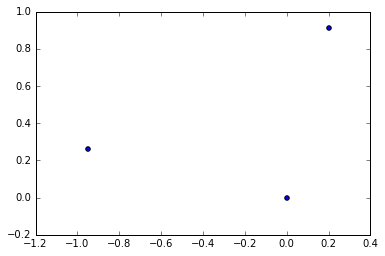

In [249]:
scatter(-0.95, 0.26)
scatter(0,0)
scatter(0.2,0.91111)

In [208]:
print ay/ax
print az/ax

0.65012810617
0.560148133128


In [119]:
I_test = RIT(X, Y, Z, q, s)
print I_test
eival, evec = eig(I_test)
print eival
ax = eival[2]
ay = eival[0]
az = eival[1]
s = sqrt(az/ax)
q = sqrt(ay/ax)

[[ 181.63826058   -4.47490201   -3.87295396]
 [  -4.47490201  130.86670303    3.55135393]
 [  -3.87295396    3.55135393  284.81104631]]
[ 181.86126126  130.40882998  285.04591868]


In [120]:
I_test = RIT(X, Y, Z, q, s)
print I_test
eival, evec = eig(I_test)
print '-----------------------------------------------'
print eival
print evec

[[ 186.1366783    -5.67971172   -3.72467961]
 [  -5.67971172  157.28569967    4.13774772]
 [  -3.72467961    4.13774772  259.55717043]]
-----------------------------------------------
[ 186.94553454  156.09734562  259.93666825]
[[ 0.98187686 -0.18176084 -0.05367342]
 [-0.17957059 -0.98279685  0.04318291]
 [ 0.06059903  0.03276213  0.99762438]]


In [ ]:
def rotation(x, y, z, ax, ay, az):
    
    

In [33]:
I_test = RIT(X-ax, Y-ay, Z-az, 0.5, 0.2)
print I_test

[[ 33.33179093  33.33450459  33.33142483]
 [ 33.33450459  33.33828425  33.3346872 ]
 [ 33.33142483  33.3346872   33.33260288]]


In [141]:
cube = zeros([3,3])

cube[0][0] = 2./3.0
cube[0][1] = -1./4.0
cube[0][2] = -1./4.0

cube[1][0] = -1./4.0
cube[1][1] = 2./3.0
cube[1][2] = -1./4.0

cube[2][0] = -1./4.0
cube[2][1] = -1./4.0
cube[2][2] = 2./3.0

print cube

[[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]


In [163]:
l, v = eigh(cube)
print l
print v[:,2]
print v
print v[0]
print v.T

[ 0.16666667  0.91666667  0.91666667]
[ 0.51113747  0.29584206 -0.80697953]
[[-0.57735027  0.63671434  0.51113747]
 [-0.57735027 -0.76101521  0.29584206]
 [-0.57735027  0.12430087 -0.80697953]]
[-0.57735027  0.63671434  0.51113747]
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.63671434 -0.76101521  0.12430087]
 [ 0.51113747  0.29584206 -0.80697953]]


In [164]:
dot(v, cube) 

array([[-0.67186313,  0.44102943,  0.3259173 ],
       [-0.26860689, -0.43696642,  0.53181941],
       [-0.21423051,  0.42894969, -0.424724  ]])

In [154]:
vdot(v[0], v[1])

-0.35502958579881672

In [134]:
v[0]

array([ 0.81649658, -0.57735027,  0.43514263])